# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
city_url = f"https://api.openweathermap.org/data/2.5/weather?q=coxim&appid={weather_api_key}"
response = requests.get(city_url)
response_json = response.json()
response_json

{'coord': {'lon': -54.76, 'lat': -18.5067},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 301.23,
  'feels_like': 302.95,
  'temp_min': 301.23,
  'temp_max': 301.23,
  'pressure': 1008,
  'humidity': 62,
  'sea_level': 1008,
  'grnd_level': 985},
 'visibility': 10000,
 'wind': {'speed': 2.14, 'deg': 97, 'gust': 2.8},
 'rain': {'1h': 0.15},
 'clouds': {'all': 63},
 'dt': 1701212406,
 'sys': {'country': 'BR', 'sunrise': 1701161602, 'sunset': 1701208852},
 'timezone': -14400,
 'id': 3465228,
 'name': 'Coxim',
 'cod': 200}

In [5]:
# Set the API base URL
url = https://api.openweathermap.org/data/2.5/weather?
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city##############
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Object `weather` not found.
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | sar-e pul
Processing Record 3 of Set 1 | chul'man
Processing Record 4 of Set 1 | enewetak
Processing Record 5 of Set 1 | saint-francois
Processing Record 6 of Set 1 | belek
Processing Record 7 of Set 1 | namibe
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | conception bay south
Processing Record 10 of Set 1 | kempsey
Processing Record 11 of Set 1 | malakal
Processing Record 12 of Set 1 | mount pearl
Processing Record 13 of Set 1 | mukah
City not found. Skipping...
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | nueve de julio
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | coyhaique
Processing Record 21 of S

Processing Record 36 of Set 4 | pangody
Processing Record 37 of Set 4 | kamaishi
Processing Record 38 of Set 4 | weno
Processing Record 39 of Set 4 | batala
Processing Record 40 of Set 4 | uturoa
Processing Record 41 of Set 4 | bismarck
Processing Record 42 of Set 4 | avarua
Processing Record 43 of Set 4 | lihue
Processing Record 44 of Set 4 | cabo san lucas
Processing Record 45 of Set 4 | calabozo
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | kabo
Processing Record 48 of Set 4 | ghadamis
Processing Record 49 of Set 4 | cruzeiro do sul
Processing Record 0 of Set 5 | vadso
Processing Record 1 of Set 5 | mountain home
Processing Record 2 of Set 5 | kavieng
Processing Record 3 of Set 5 | el calafate
Processing Record 4 of Set 5 | westport
Processing Record 5 of Set 5 | katsuura
Processing Record 6 of Set 5 | seward
Processing Record 7 of Set 5 | arar
Processing Record 8 of Set 5 | boguchany
Processing Record 9 of Set 5 | mount gambier
Processing Record 10 of Se

Processing Record 28 of Set 8 | barclayville
Processing Record 29 of Set 8 | hushitai
Processing Record 30 of Set 8 | dauphin
Processing Record 31 of Set 8 | timaru
Processing Record 32 of Set 8 | atafu village
Processing Record 33 of Set 8 | bou arada
Processing Record 34 of Set 8 | daulatpur
Processing Record 35 of Set 8 | hirara
Processing Record 36 of Set 8 | ebon
Processing Record 37 of Set 8 | konarka
Processing Record 38 of Set 8 | paita
Processing Record 39 of Set 8 | siwa oasis
Processing Record 40 of Set 8 | inverloch
Processing Record 41 of Set 8 | three rivers
Processing Record 42 of Set 8 | saint-hilaire-de-talmont
Processing Record 43 of Set 8 | st. john's
Processing Record 44 of Set 8 | saratamata
City not found. Skipping...
Processing Record 45 of Set 8 | yigo village
Processing Record 46 of Set 8 | petropavlovsk-kamchatsky
Processing Record 47 of Set 8 | ghanzi
Processing Record 48 of Set 8 | rio gallegos
Processing Record 49 of Set 8 | kruisfontein
Processing Record 0

Processing Record 16 of Set 12 | al kharj
Processing Record 17 of Set 12 | christchurch
Processing Record 18 of Set 12 | iquique
Processing Record 19 of Set 12 | loukhi
Processing Record 20 of Set 12 | zhezqazghan
Processing Record 21 of Set 12 | edd
Processing Record 22 of Set 12 | jalai nur
Processing Record 23 of Set 12 | zvezdnyy
Processing Record 24 of Set 12 | vila velha
Processing Record 25 of Set 12 | kismayo
Processing Record 26 of Set 12 | dunedin
Processing Record 27 of Set 12 | san jeronimo de juarez
Processing Record 28 of Set 12 | beberibe
Processing Record 29 of Set 12 | mont-joli
Processing Record 30 of Set 12 | kerikeri
Processing Record 31 of Set 12 | axim
Processing Record 32 of Set 12 | kasempa
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,college,64.8569,-147.8028,-6.97,91,40,4.12,US,1701212455
1,sar-e pul,35.8333,66.1667,10.33,31,100,1.11,AF,1701212457
2,chul'man,56.8479,124.9104,-17.20,95,100,6.18,RU,1701212459
3,enewetak,11.3474,162.3373,27.80,71,64,10.13,MH,1701212461
4,saint-francois,46.4154,3.9054,0.69,93,100,0.51,FR,1701212462


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,-6.97,91,40,4.12,US,1701212455
1,sar-e pul,35.8333,66.1667,10.33,31,100,1.11,AF,1701212457
2,chul'man,56.8479,124.9104,-17.20,95,100,6.18,RU,1701212459
3,enewetak,11.3474,162.3373,27.80,71,64,10.13,MH,1701212461
4,saint-francois,46.4154,3.9054,0.69,93,100,0.51,FR,1701212462


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

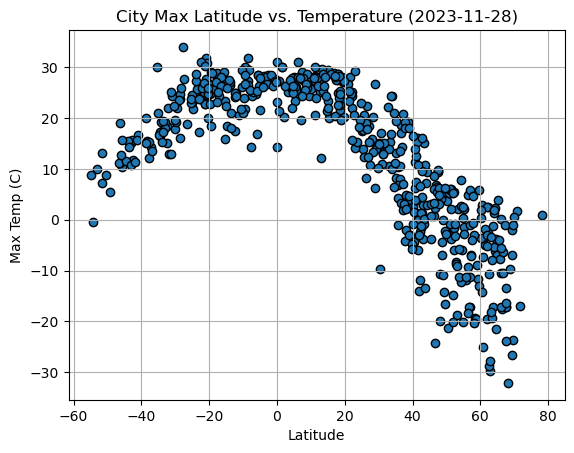

In [10]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
plt.grid(True, linestyle='-')
plt.title("City Max Latitude vs. Temperature (2023-11-28)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

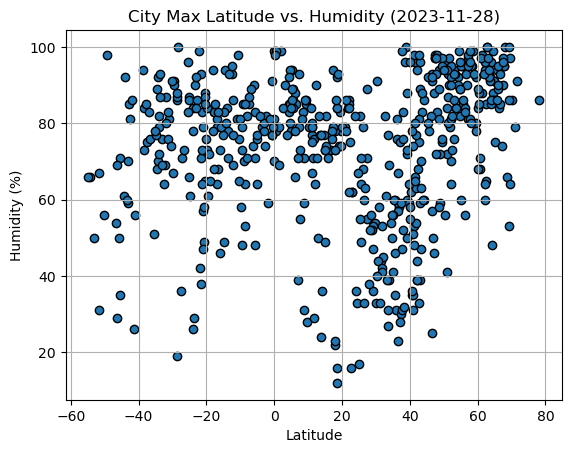

In [11]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
plt.grid(True, linestyle='-')
plt.title("City Max Latitude vs. Humidity (2023-11-28)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

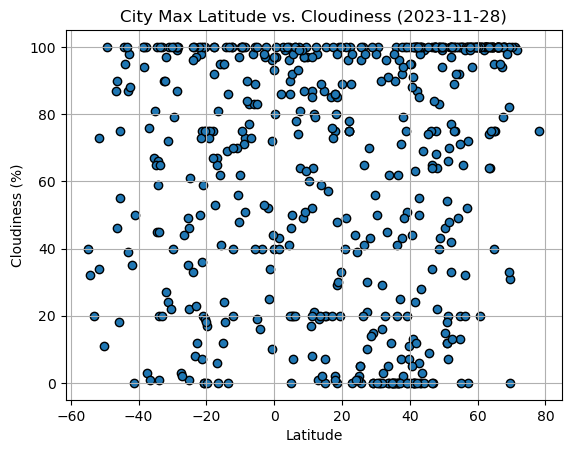

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
plt.grid(True, linestyle='-')
plt.title("City Max Latitude vs. Cloudiness (2023-11-28)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

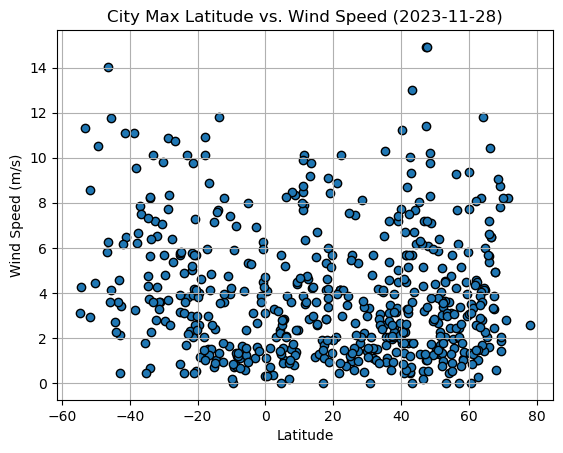

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, edgecolors="black")

# Incorporate the other graph properties
plt.grid(True, linestyle='-')
plt.title("City Max Latitude vs. Wind Speed (2023-11-28)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,-6.97,91,40,4.12,US,1701212455
1,sar-e pul,35.8333,66.1667,10.33,31,100,1.11,AF,1701212457
2,chul'man,56.8479,124.9104,-17.20,95,100,6.18,RU,1701212459
3,enewetak,11.3474,162.3373,27.80,71,64,10.13,MH,1701212461
4,saint-francois,46.4154,3.9054,0.69,93,100,0.51,FR,1701212462


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,namibe,-15.1961,12.1522,23.36,79,95,0.71,AO,1701212465
7,port elizabeth,-33.9180,25.5701,17.40,82,20,8.23,ZA,1701212467
9,kempsey,-31.0833,152.8333,24.41,81,100,3.58,AU,1701212470
12,grytviken,-54.2811,-36.5092,-0.41,66,32,4.28,GS,1701212478
14,nueve de julio,-35.4444,-60.8831,29.98,51,67,1.79,AR,1701212483


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7446229189747401


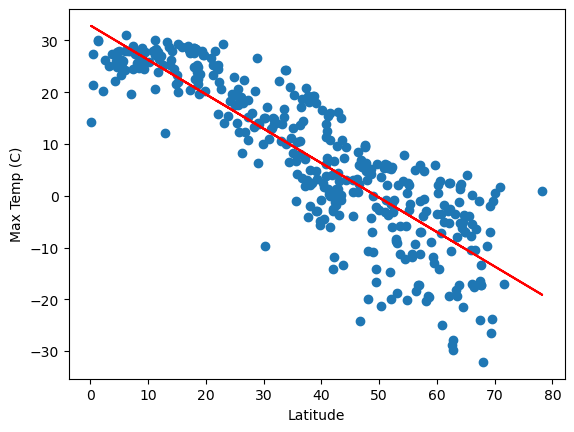

In [17]:
# Linear regression on Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_max_temp = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_max_temp)


y = slope * northern_lat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_lat, northern_max_temp)
plt.plot(northern_lat, y, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.annotate(line_eq,(30,310),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

The r-squared is: 0.5634820548095518


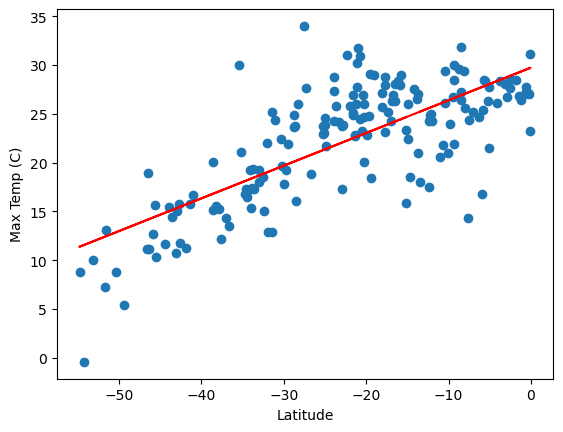

In [18]:
# Linear regression on Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_max_temp = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_max_temp)


y = slope * southern_lat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_lat, southern_max_temp)
plt.plot(southern_lat, y, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.annotate(line_eq,(-50,310),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** 
The max temperature of a city seems to increase the closer that city is the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.07133647210687552


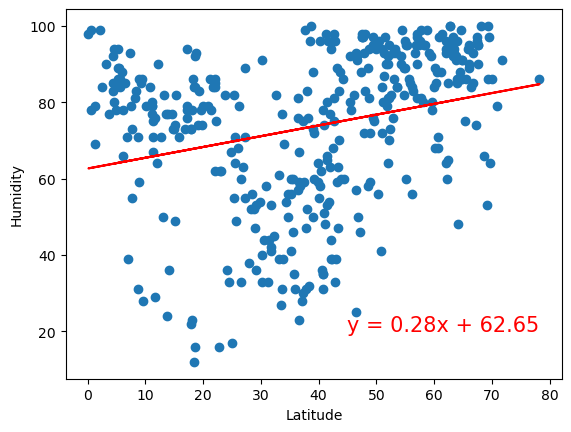

In [19]:
# Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_humidity = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_humidity)


y = slope * northern_lat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_lat, northern_humidity)
plt.plot(northern_lat, y, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

The r-squared is: 0.045835399606401976


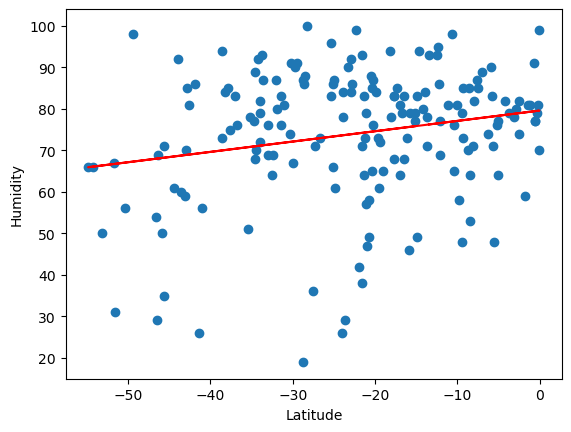

In [20]:
# Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_humidity = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_humidity)


y = slope * southern_lat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_lat, southern_humidity)
plt.plot(southern_lat, y, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** 
The data does not show a clear trend or pattern indicating a correlation between a city's humidity and its distance to the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.05112539568585013


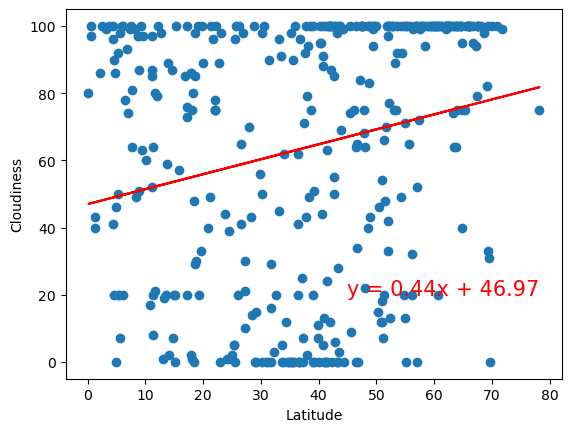

In [21]:
# Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_cloudiness = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_cloudiness)


y = slope * northern_lat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_lat, northern_cloudiness)
plt.plot(northern_lat, y, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

The r-squared is: 0.006717956886344762


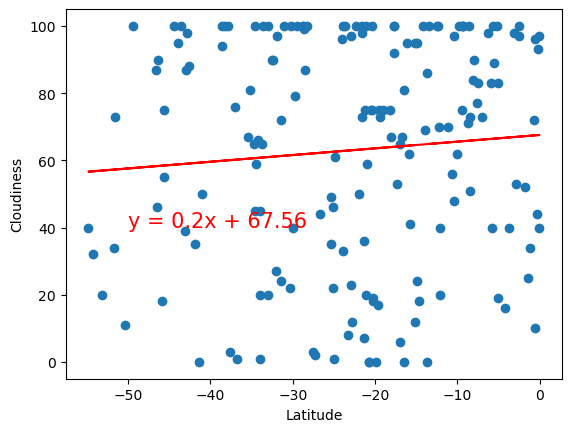

In [22]:
# Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_cloudiness = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_cloudiness)


y = slope * southern_lat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_lat, southern_cloudiness)
plt.plot(southern_lat, y, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** 

The data does not show a clear trend or pattern indicating a correlation between a city's cloudiness and its distance to the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00492645495305651


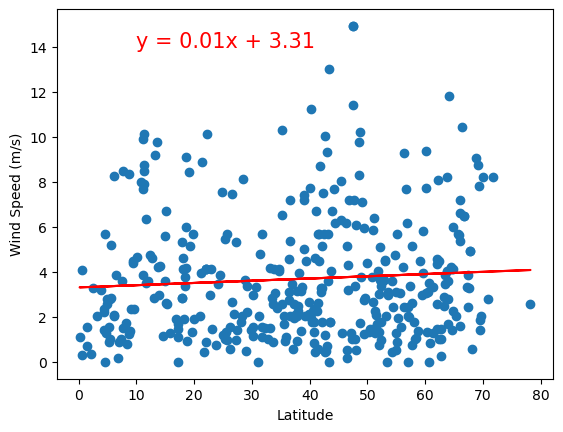

In [23]:
# Northern Hemisphere
northern_lat = northern_hemi_df["Lat"]
northern_wind_speed = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_lat, northern_wind_speed)


y = slope * northern_lat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_lat, northern_wind_speed)
plt.plot(northern_lat, y, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.annotate(line_eq,(10,14),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

The r-squared is: 0.11258116432233266


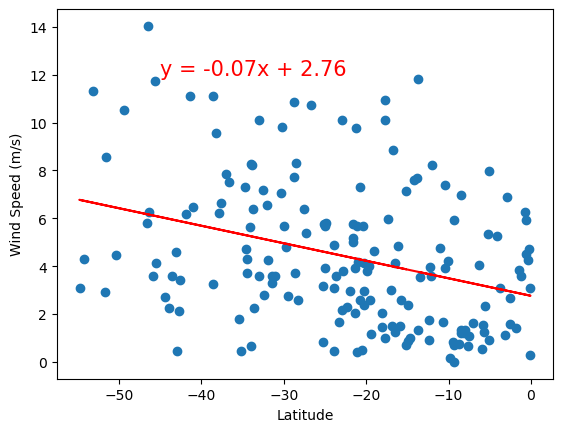

In [24]:
# Southern Hemisphere
southern_lat = southern_hemi_df["Lat"]
southern_wind_speed = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_lat, southern_wind_speed)


y = slope * southern_lat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_lat, southern_wind_speed)
plt.plot(southern_lat, y, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.annotate(line_eq,(-45,12),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")


plt.show()

**Discussion about the linear relationship:** 

The data does not show a clear trend or pattern indicating a correlation between a city's humidity and its distance to the equator.